In [2]:
!pip install matplotlib seaborn pandas numpy

  Using cached contourpy-1.3.3-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (5.5 kB)
  Using cached contourpy-1.3.3-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.9-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (6.3 kB)
  Using cached kiwisolver-1.4.9-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (6.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/8.7 MB ? eta -:--:--Downloading matplotlib-3.10.8-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (8.7 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 14.5 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 14.5 MB/s  0:00:00
Using cached contourpy-1.3.3-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (362 kB)
Using cached

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (7, 4)

## 1. NumPy

### 1.1 Criação de arrays e tipos

In [4]:
arr_list = [1, 2, 3, 4]
arr = np.array(arr_list)
print("Array:", arr)
print("dtype:", arr.dtype)

# especificando dtype
arr_float = np.array([1, 2, 3], dtype=np.float32)
print("Array float32:", arr_float, arr_float.dtype)

# matriz 2D
mat = np.array([[1, 2, 3],
                [4, 5, 6]])
print("Matriz 2D:\n", mat)

Array: [1 2 3 4]
dtype: int64
Array float32: [1. 2. 3.] float32
Matriz 2D:
 [[1 2 3]
 [4 5 6]]


In [5]:
# zeros, ones, arange, linspace
zeros = np.zeros((2, 3))
ones = np.ones((2, 3))
arange = np.arange(0, 10, 2)   # [0,2,4,6,8]
linspace = np.linspace(0, 1, 5)

print("zeros:\n", zeros)
print("ones:\n", ones)
print("arange:", arange)
print("linspace:", linspace)

zeros:
 [[0. 0. 0.]
 [0. 0. 0.]]
ones:
 [[1. 1. 1.]
 [1. 1. 1.]]
arange: [0 2 4 6 8]
linspace: [0.   0.25 0.5  0.75 1.  ]


### 1.2 Indexação, slicing, boolean mask

In [6]:
print("arr:", arr)
print("arr[0]:", arr[0])
print("arr[-1]:", arr[-1])
print("arr[1:3]:", arr[1:3])

print("Primeira linha da mat:", mat[0])
print("Segunda coluna da mat:", mat[:, 1])

# boolean mask
mask = arr > 2
print("mask:", mask)
print("arr[mask]:", arr[mask])   # elementos > 2

# combinações
mask2 = (arr >= 2) & (arr <= 3)
print("Entre 2 e 3:", arr[mask2])

arr: [1 2 3 4]
arr[0]: 1
arr[-1]: 4
arr[1:3]: [2 3]
Primeira linha da mat: [1 2 3]
Segunda coluna da mat: [2 5]
mask: [False False  True  True]
arr[mask]: [3 4]
Entre 2 e 3: [2 3]


### 1.3 Operações vetorizadas, estatísticas, broadcasting

In [7]:
print("arr + 10:", arr + 10)
print("arr * 2:", arr * 2)
print("arr ** 2:", arr ** 2)

print("mean:", arr.mean())
print("std:", arr.std())
print("min:", arr.min(), "max:", arr.max())
print("sum:", arr.sum())

# broadcasting: somar vetor linha com vetor coluna
a = np.array([1, 2, 3])
b = np.array([[10],
              [20],
              [30]])
print("\na:\n", a)
print("b:\n", b)
print("a + b:\n", a + b)

arr + 10: [11 12 13 14]
arr * 2: [2 4 6 8]
arr ** 2: [ 1  4  9 16]
mean: 2.5
std: 1.118033988749895
min: 1 max: 4
sum: 10

a:
 [1 2 3]
b:
 [[10]
 [20]
 [30]]
a + b:
 [[11 12 13]
 [21 22 23]
 [31 32 33]]


### 1.4 Operações de álgebra linear

In [8]:
M = np.array([[1, 2],
              [3, 4]])
v = np.array([1, 0])

print("M:\n", M)
print("v:", v)

print("M @ v:", M @ v)         # multiplicação matriz-vetor
print("det(M):", np.linalg.det(M))
print("inv(M):\n", np.linalg.inv(M))

M:
 [[1 2]
 [3 4]]
v: [1 0]
M @ v: [1 3]
det(M): -2.0000000000000004
inv(M):
 [[-2.   1. ]
 [ 1.5 -0.5]]


## 2. Pandas – carregando, explorando e limpando dados

### 2.1 Criando DataFrame e visão geral

In [9]:
alunos = {
    "nome": ["Ana", "Bruno", "Carla", "Diego", "Eva", "Felipe"],
    "curso": ["Engenharia", "Computação", "Computação", "Engenharia", "Engenharia", "Computação"],
    "nota_prova": [7.5, 8.0, 9.2, 6.8, 7.9, 5.5],
    "nota_trabalho": [8.0, 7.5, 9.0, 7.2, 8.5, 6.0],
    "faltas": [2, 0, 1, 5, 3, 4],
}

df = pd.DataFrame(alunos)
print(df)

     nome       curso  nota_prova  nota_trabalho  faltas
0     Ana  Engenharia         7.5            8.0       2
1   Bruno  Computação         8.0            7.5       0
2   Carla  Computação         9.2            9.0       1
3   Diego  Engenharia         6.8            7.2       5
4     Eva  Engenharia         7.9            8.5       3
5  Felipe  Computação         5.5            6.0       4


In [10]:
print("\nhead():")
print(df.head())

print("\ninfo():")
print(df.info())

print("\ndescribe():")
print(df.describe())


head():
    nome       curso  nota_prova  nota_trabalho  faltas
0    Ana  Engenharia         7.5            8.0       2
1  Bruno  Computação         8.0            7.5       0
2  Carla  Computação         9.2            9.0       1
3  Diego  Engenharia         6.8            7.2       5
4    Eva  Engenharia         7.9            8.5       3

info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   nome           6 non-null      object 
 1   curso          6 non-null      object 
 2   nota_prova     6 non-null      float64
 3   nota_trabalho  6 non-null      float64
 4   faltas         6 non-null      int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 372.0+ bytes
None

describe():
       nota_prova  nota_trabalho    faltas
count    6.000000       6.000000  6.000000
mean     7.483333       7.700000  2.500000
std      1.248065       

### 2.2 Seleção de colunas, linhas, iloc/loc

In [11]:
print("\nSomente nomes:")
print(df["nome"])

print("\nNomes e curso:")
print(df[["nome", "curso"]])

print("\nPrimeiras 3 linhas (iloc):")
print(df.iloc[:3])

print("\nLinhas com índice 1 e 4 (iloc):")
print(df.iloc[[1, 4]])

print("\nloc com condição (media_final >= 7) será usado depois")


Somente nomes:
0       Ana
1     Bruno
2     Carla
3     Diego
4       Eva
5    Felipe
Name: nome, dtype: object

Nomes e curso:
     nome       curso
0     Ana  Engenharia
1   Bruno  Computação
2   Carla  Computação
3   Diego  Engenharia
4     Eva  Engenharia
5  Felipe  Computação

Primeiras 3 linhas (iloc):
    nome       curso  nota_prova  nota_trabalho  faltas
0    Ana  Engenharia         7.5            8.0       2
1  Bruno  Computação         8.0            7.5       0
2  Carla  Computação         9.2            9.0       1

Linhas com índice 1 e 4 (iloc):
    nome       curso  nota_prova  nota_trabalho  faltas
1  Bruno  Computação         8.0            7.5       0
4    Eva  Engenharia         7.9            8.5       3

loc com condição (media_final >= 7) será usado depois


### 2.3 Criando colunas, drop, rename

In [12]:
df["media_final"] = 0.6 * df["nota_prova"] + 0.4 * df["nota_trabalho"]
print("\nCom media_final:")
print(df)

# renomeando coluna
df_renomeado = df.rename(columns={"media_final": "media"})
print("\nColunas renomeadas:")
print(df_renomeado.head())

# removendo coluna (sem alterar o original)
df_sem_faltas = df.drop(columns=["faltas"])
print("\nSem coluna faltas:")
print(df_sem_faltas.head())


Com media_final:
     nome       curso  nota_prova  nota_trabalho  faltas  media_final
0     Ana  Engenharia         7.5            8.0       2         7.70
1   Bruno  Computação         8.0            7.5       0         7.80
2   Carla  Computação         9.2            9.0       1         9.12
3   Diego  Engenharia         6.8            7.2       5         6.96
4     Eva  Engenharia         7.9            8.5       3         8.14
5  Felipe  Computação         5.5            6.0       4         5.70

Colunas renomeadas:
    nome       curso  nota_prova  nota_trabalho  faltas  media
0    Ana  Engenharia         7.5            8.0       2   7.70
1  Bruno  Computação         8.0            7.5       0   7.80
2  Carla  Computação         9.2            9.0       1   9.12
3  Diego  Engenharia         6.8            7.2       5   6.96
4    Eva  Engenharia         7.9            8.5       3   8.14

Sem coluna faltas:
    nome       curso  nota_prova  nota_trabalho  media_final
0    Ana  En

### 2.4 Filtragem, value_counts, groupby

In [13]:
# filtro com condição
aprovados = df[df["media_final"] >= 7.0]
print("\nAprovados:")
print(aprovados)

# múltiplas condições
eng_altas = df[(df["curso"] == "Engenharia") & (df["media_final"] >= 7.5)]
print("\nEngenharia com média >= 7.5:")
print(eng_altas)

# frequências
print("\nvalue_counts do curso:")
print(df["curso"].value_counts())

# groupby
media_por_curso = df.groupby("curso")["media_final"].mean()
print("\nMédia por curso:")
print(media_por_curso)

# agregações múltiplas
agg_curso = df.groupby("curso").agg(
    media=("media_final", "mean"),
    max_nota=("media_final", "max"),
    qtd=("nome", "count"),
)
print("\nAgregações por curso:")
print(agg_curso)


Aprovados:
    nome       curso  nota_prova  nota_trabalho  faltas  media_final
0    Ana  Engenharia         7.5            8.0       2         7.70
1  Bruno  Computação         8.0            7.5       0         7.80
2  Carla  Computação         9.2            9.0       1         9.12
4    Eva  Engenharia         7.9            8.5       3         8.14

Engenharia com média >= 7.5:
  nome       curso  nota_prova  nota_trabalho  faltas  media_final
0  Ana  Engenharia         7.5            8.0       2         7.70
4  Eva  Engenharia         7.9            8.5       3         8.14

value_counts do curso:
curso
Engenharia    3
Computação    3
Name: count, dtype: int64

Média por curso:
curso
Computação    7.54
Engenharia    7.60
Name: media_final, dtype: float64

Agregações por curso:
            media  max_nota  qtd
curso                           
Computação   7.54      9.12    3
Engenharia   7.60      8.14    3


### 2.5 Tratando valores ausentes (NaN)

In [14]:
df_nan = df.copy()
df_nan.loc[2, "nota_trabalho"] = np.nan  # simulando dado faltante
print("\nCom NaN em nota_trabalho (linha Carla):")
print(df_nan)

print("\nQuantidade de NaN por coluna:")
print(df_nan.isnull().sum())

# removendo linhas com NaN
print("\nDropna:")
print(df_nan.dropna())

# preenchendo NaN com média da coluna
media_trab = df_nan["nota_trabalho"].mean()
df_filled = df_nan.fillna({"nota_trabalho": media_trab})
print("\nPreenchendo NaN com média:")
print(df_filled)


Com NaN em nota_trabalho (linha Carla):
     nome       curso  nota_prova  nota_trabalho  faltas  media_final
0     Ana  Engenharia         7.5            8.0       2         7.70
1   Bruno  Computação         8.0            7.5       0         7.80
2   Carla  Computação         9.2            NaN       1         9.12
3   Diego  Engenharia         6.8            7.2       5         6.96
4     Eva  Engenharia         7.9            8.5       3         8.14
5  Felipe  Computação         5.5            6.0       4         5.70

Quantidade de NaN por coluna:
nome             0
curso            0
nota_prova       0
nota_trabalho    1
faltas           0
media_final      0
dtype: int64

Dropna:
     nome       curso  nota_prova  nota_trabalho  faltas  media_final
0     Ana  Engenharia         7.5            8.0       2         7.70
1   Bruno  Computação         8.0            7.5       0         7.80
3   Diego  Engenharia         6.8            7.2       5         6.96
4     Eva  Engenharia 

## 3. Matplotlib – gráficos básicos

### 3.1 Histograma, gráfico de barras, linha

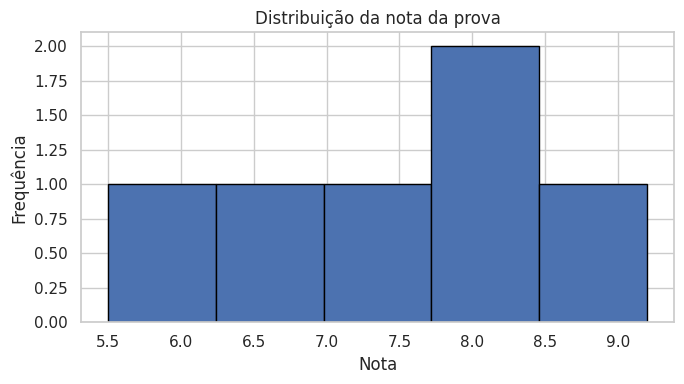

In [15]:
# histograma da nota_prova
plt.figure()
plt.hist(df["nota_prova"], bins=5, edgecolor="black")
plt.title("Distribuição da nota da prova")
plt.xlabel("Nota")
plt.ylabel("Frequência")
plt.tight_layout()
plt.show()

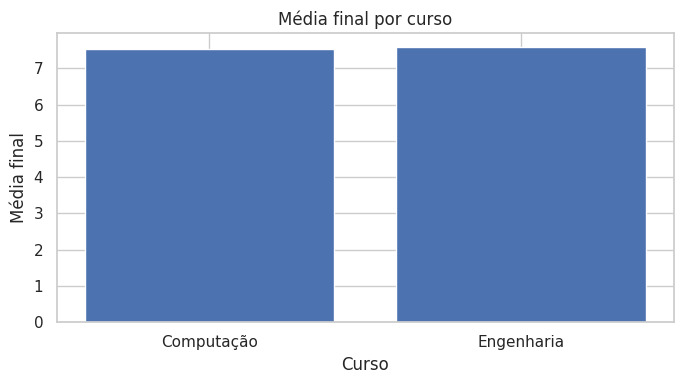

In [16]:
# gráfico de barras: média por curso
plt.figure()
plt.bar(agg_curso.index, agg_curso["media"])
plt.title("Média final por curso")
plt.xlabel("Curso")
plt.ylabel("Média final")
plt.tight_layout()
plt.show()

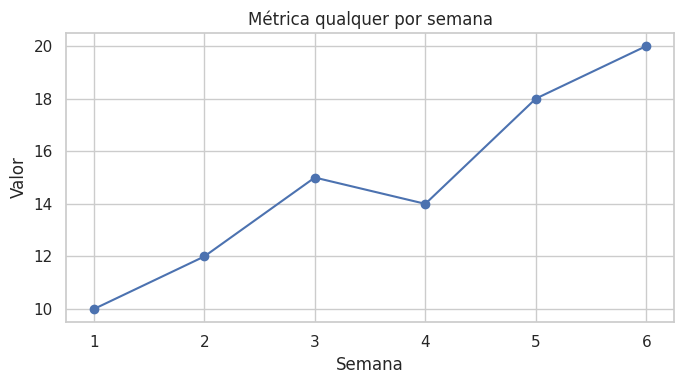

In [17]:
# gráfico de linha: evolução de uma métrica fictícia
semanas = np.arange(1, 7)
metric = np.array([10, 12, 15, 14, 18, 20])
plt.figure()
plt.plot(semanas, metric, marker="o")
plt.title("Métrica qualquer por semana")
plt.xlabel("Semana")
plt.ylabel("Valor")
plt.tight_layout()
plt.show()

## 4. Seaborn – visualizações estatísticas

### 4.1 Boxplot, scatterplot, countplot

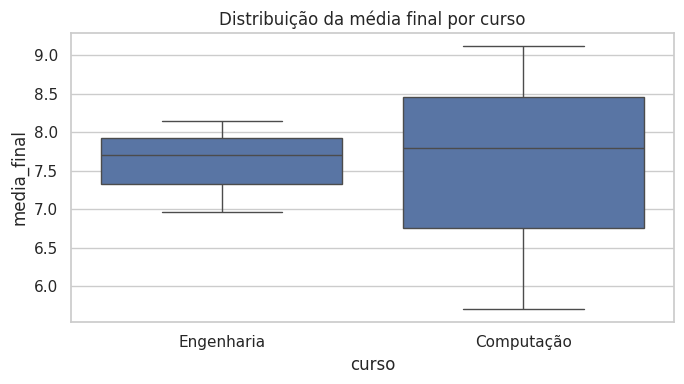

In [18]:
# boxplot por curso
plt.figure()
sns.boxplot(data=df, x="curso", y="media_final")
plt.title("Distribuição da média final por curso")
plt.tight_layout()
plt.show()

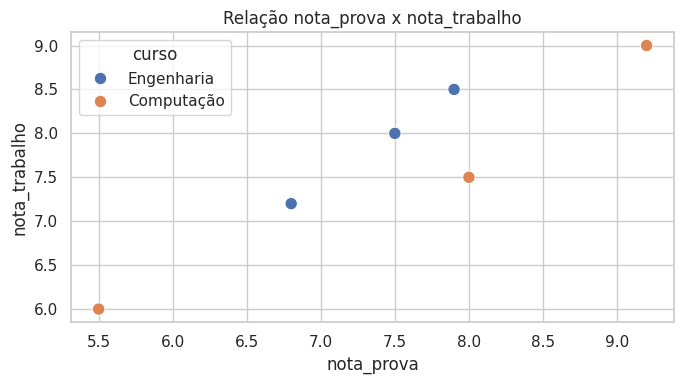

In [19]:
# scatterplot entre prova e trabalho
plt.figure()
sns.scatterplot(data=df, x="nota_prova", y="nota_trabalho",
                hue="curso", s=80)
plt.title("Relação nota_prova x nota_trabalho")
plt.tight_layout()
plt.show()

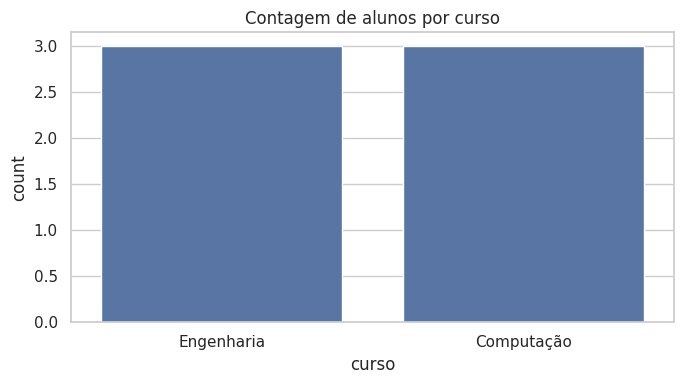

In [20]:
# countplot: quantidade de alunos por curso
plt.figure()
sns.countplot(data=df, x="curso")
plt.title("Contagem de alunos por curso")
plt.tight_layout()
plt.show()

### 4.2 Heatmap de correlação, pairplot


Matriz de correlação:
                nota_prova  nota_trabalho  media_final    faltas
nota_prova       1.000000       0.935777     0.991610 -0.715229
nota_trabalho    0.935777       1.000000     0.973504 -0.505076
media_final      0.991610       0.973504     1.000000 -0.649023
faltas          -0.715229      -0.505076    -0.649023  1.000000


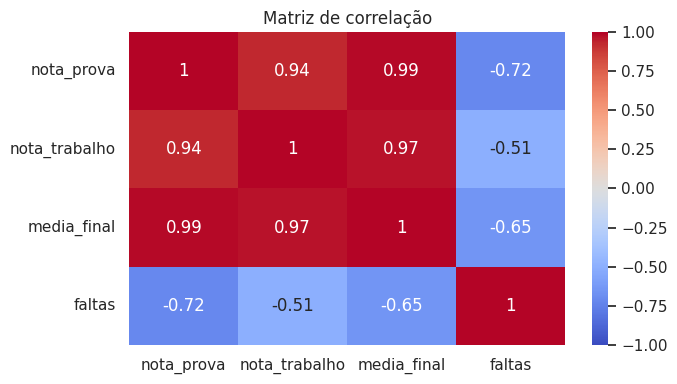

In [21]:
corr = df[["nota_prova", "nota_trabalho", "media_final", "faltas"]].corr()
print("\nMatriz de correlação:\n", corr)

plt.figure()
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matriz de correlação")
plt.tight_layout()
plt.show()

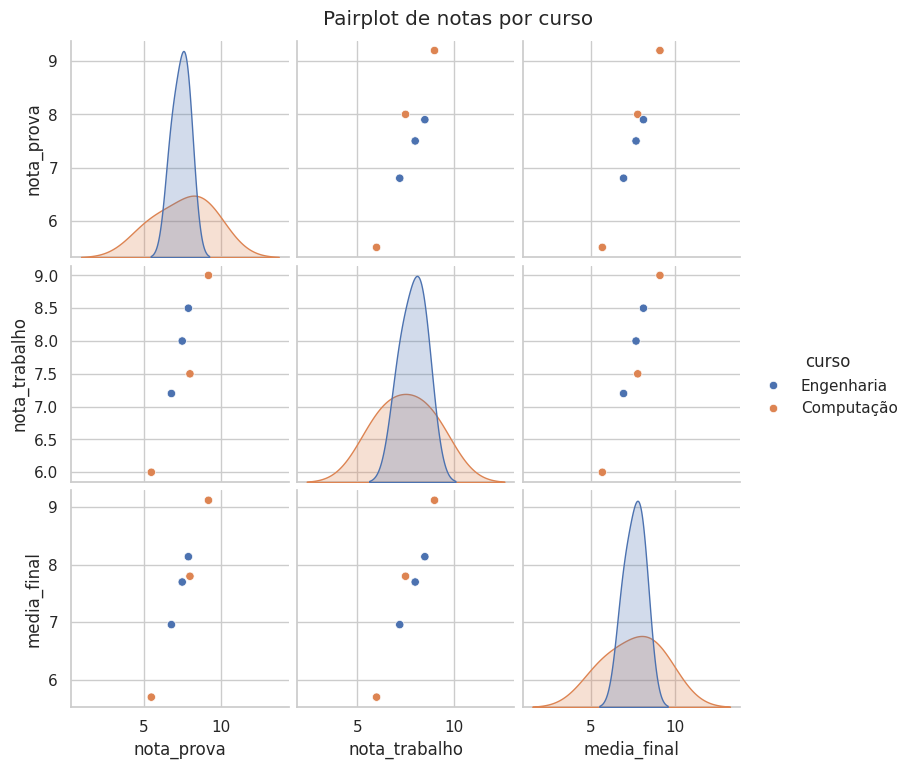

In [22]:
# Pairplot (cuidado em datasets grandes)
sns.pairplot(df, vars=["nota_prova", "nota_trabalho", "media_final"],
             hue="curso")
plt.suptitle("Pairplot de notas por curso", y=1.02)
plt.show()

## 5. NumPy Avançado – Operações essenciais para ML

### 5.1 Reshape, flatten e transposição

In [23]:
# Reshape: redimensionar arrays
X = np.arange(12)
print("Array original:", X, "shape:", X.shape)

X_reshaped = X.reshape(3, 4)
print("Reshaped (3, 4):\n", X_reshaped)

X_reshaped2 = X.reshape(2, 3, 2)
print("Reshaped (2, 3, 2):\n", X_reshaped2)

# Flatten: converter matriz para vetor 1D
print("Flatten:", X_reshaped.flatten())
print("Ravel:", X_reshaped.ravel())  # similar mas mais eficiente

# Transposição
mat_orig = np.array([[1, 2, 3],
                     [4, 5, 6]])
print("\nMatriz original:\n", mat_orig)
print("Transposta:\n", mat_orig.T)

Array original: [ 0  1  2  3  4  5  6  7  8  9 10 11] shape: (12,)
Reshaped (3, 4):
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
Reshaped (2, 3, 2):
 [[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]]
Flatten: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Ravel: [ 0  1  2  3  4  5  6  7  8  9 10 11]

Matriz original:
 [[1 2 3]
 [4 5 6]]
Transposta:
 [[1 4]
 [2 5]
 [3 6]]


### 5.2 Normalização, padronização e transformações

In [24]:
# Dados de exemplo: features com escalas diferentes
features = np.array([[1.0, 100.0],
                     [2.0, 200.0],
                     [3.0, 150.0],
                     [4.0, 300.0]])

print("Features originais:\n", features)

# Normalização Min-Max (0-1)
X_min = features.min(axis=0)
X_max = features.max(axis=0)
X_normalized = (features - X_min) / (X_max - X_min)
print("\nNormalizado (0-1):\n", X_normalized)

# Padronização (Z-score)
X_mean = features.mean(axis=0)
X_std = features.std(axis=0)
X_standardized = (features - X_mean) / X_std
print("\nPadronizado (Z-score):\n", X_standardized)

# Log transformation (para dados com distribuição assimétrica)
positive_data = np.array([1, 10, 100, 1000])
log_data = np.log(positive_data)
print("\nLog transformation:", log_data)

Features originais:
 [[  1. 100.]
 [  2. 200.]
 [  3. 150.]
 [  4. 300.]]

Normalizado (0-1):
 [[0.         0.        ]
 [0.33333333 0.5       ]
 [0.66666667 0.25      ]
 [1.         1.        ]]

Padronizado (Z-score):
 [[-1.34164079 -1.18321596]
 [-0.4472136   0.16903085]
 [ 0.4472136  -0.50709255]
 [ 1.34164079  1.52127766]]

Log transformation: [0.         2.30258509 4.60517019 6.90775528]


### 5.3 Concatenação, stack, split

In [25]:
# Arrays para combinar
a1 = np.array([[1, 2],
               [3, 4]])
a2 = np.array([[5, 6],
               [7, 8]])

# Concatenação
concat_axis0 = np.concatenate([a1, a2], axis=0)  # empilha verticalmente
concat_axis1 = np.concatenate([a1, a2], axis=1)  # empilha horizontalmente
print("Concatenate axis=0:\n", concat_axis0)
print("\nConcatenate axis=1:\n", concat_axis1)

# Stack (cria nova dimensão)
stacked = np.stack([a1, a2], axis=0)
print("\nStack (axis=0):", stacked.shape)
print(stacked)

# Hstack e Vstack
hstack = np.hstack([a1, a2])  # horizontal stack
vstack = np.vstack([a1, a2])  # vertical stack
print("\nHstack:\n", hstack)
print("Vstack:\n", vstack)

# Split (dividir arrays)
X = np.arange(12).reshape(3, 4)
X_split = np.split(X, 2, axis=1)
print("\nArray original:\n", X)
print("Split em 2 partes (axis=1):", len(X_split), "arrays")

Concatenate axis=0:
 [[1 2]
 [3 4]
 [5 6]
 [7 8]]

Concatenate axis=1:
 [[1 2 5 6]
 [3 4 7 8]]

Stack (axis=0): (2, 2, 2)
[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]

Hstack:
 [[1 2 5 6]
 [3 4 7 8]]
Vstack:
 [[1 2]
 [3 4]
 [5 6]
 [7 8]]

Array original:
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
Split em 2 partes (axis=1): 2 arrays


### 5.4 Números aleatórios, permutações, sampling

In [26]:
# Seed para reprodutibilidade
np.random.seed(42)

# Números aleatórios
rand_uniform = np.random.rand(3, 2)  # uniforme [0, 1)
rand_normal = np.random.randn(3, 2)  # normal (média=0, std=1)
rand_int = np.random.randint(0, 100, size=5)  # inteiros
print("Uniforme:\n", rand_uniform)
print("\nNormal:\n", rand_normal)
print("\nInteiros:", rand_int)

# Permutação (shuffle)
indices = np.arange(10)
np.random.shuffle(indices)
print("\nIndices shuffled:", indices)

# Permutação sem modificar original
perm = np.random.permutation(10)
print("Permutation:", perm)

# Sampling (com/sem reposição)
choices = np.random.choice(10, size=5, replace=False)  # sem reposição
print("Sample 5 de 10 (sem reposição):", choices)

# Weighted sampling
weights = np.array([0.1, 0.2, 0.3, 0.4])
weighted_choice = np.random.choice([0, 1, 2, 3], size=1000, p=weights)
unique, counts = np.unique(weighted_choice, return_counts=True)
print("\nWeighted sampling distribution:", dict(zip(unique, counts / 1000)))

Uniforme:
 [[0.37454012 0.95071431]
 [0.73199394 0.59865848]
 [0.15601864 0.15599452]]

Normal:
 [[ 1.57921282  0.76743473]
 [-0.46947439  0.54256004]
 [-0.46341769 -0.46572975]]

Inteiros: [75 57 21 88 48]

Indices shuffled: [1 5 4 8 0 7 6 3 2 9]
Permutation: [8 2 5 7 3 1 9 0 4 6]
Sample 5 de 10 (sem reposição): [0 5 2 6 3]

Weighted sampling distribution: {np.int64(0): np.float64(0.108), np.int64(1): np.float64(0.208), np.int64(2): np.float64(0.291), np.int64(3): np.float64(0.393)}


## 6. Pandas Avançado – Transformação e Feature Engineering

### 6.1 Apply, map, transformações customizadas

In [27]:
# Apply: aplicar função a cada linha/coluna
df_copy = df.copy()

# Função customizada
def categoria_desempenho(media):
    if media >= 8.5:
        return "Excelente"
    elif media >= 7.0:
        return "Bom"
    else:
        return "Precisa melhorar"

df_copy["desempenho"] = df_copy["media_final"].apply(categoria_desempenho)
print("Com categorias de desempenho:")
print(df_copy[["nome", "media_final", "desempenho"]])

# Apply com lambda
df_copy["nota_normalizada"] = df_copy["nota_prova"].apply(lambda x: (x - 5) / 5)
print("\nNota normalizada:")
print(df_copy[["nota_prova", "nota_normalizada"]])

# Map: substituir valores
curso_map = {"Engenharia": "ENG", "Computação": "COM"}
df_copy["curso_cod"] = df_copy["curso"].map(curso_map)
print("\nCurso codificado:")
print(df_copy[["curso", "curso_cod"]])

Com categorias de desempenho:
     nome  media_final        desempenho
0     Ana         7.70               Bom
1   Bruno         7.80               Bom
2   Carla         9.12         Excelente
3   Diego         6.96  Precisa melhorar
4     Eva         8.14               Bom
5  Felipe         5.70  Precisa melhorar

Nota normalizada:
   nota_prova  nota_normalizada
0         7.5              0.50
1         8.0              0.60
2         9.2              0.84
3         6.8              0.36
4         7.9              0.58
5         5.5              0.10

Curso codificado:
        curso curso_cod
0  Engenharia       ENG
1  Computação       COM
2  Computação       COM
3  Engenharia       ENG
4  Engenharia       ENG
5  Computação       COM


### 6.2 One-hot encoding, label encoding

In [28]:
# Label Encoding: converter categorias para números
df_le = df.copy()
cursos_unicos = df_le["curso"].unique()
curso_dict = {curso: idx for idx, curso in enumerate(cursos_unicos)}
df_le["curso_encoded"] = df_le["curso"].map(curso_dict)
print("Label Encoding:")
print(df_le[["curso", "curso_encoded"]])

# One-Hot Encoding: criar variáveis dummy
df_ohe = pd.get_dummies(df[["nome", "curso"]], columns=["curso"], prefix="curso")
print("\nOne-Hot Encoding:")
print(df_ohe)

# Drop first para evitar multicolinearidade
df_ohe_drop = pd.get_dummies(df[["nome", "curso"]], columns=["curso"], 
                              prefix="curso", drop_first=True)
print("\nOne-Hot Encoding (drop_first=True):")
print(df_ohe_drop)

Label Encoding:
        curso  curso_encoded
0  Engenharia              0
1  Computação              1
2  Computação              1
3  Engenharia              0
4  Engenharia              0
5  Computação              1

One-Hot Encoding:
     nome  curso_Computação  curso_Engenharia
0     Ana             False              True
1   Bruno              True             False
2   Carla              True             False
3   Diego             False              True
4     Eva             False              True
5  Felipe              True             False

One-Hot Encoding (drop_first=True):
     nome  curso_Engenharia
0     Ana              True
1   Bruno             False
2   Carla             False
3   Diego              True
4     Eva              True
5  Felipe             False


### 6.3 Binning, categorização contínua

In [29]:
# Binning: dividir variável contínua em categorias
df_bin = df.copy()

# Equal-width binning (igual amplitude)
df_bin["nota_prova_bin"] = pd.cut(df_bin["nota_prova"], 
                                   bins=3, 
                                   labels=["Baixa", "Média", "Alta"])
print("Equal-width binning:")
print(df_bin[["nota_prova", "nota_prova_bin"]])

# Equal-frequency binning (quantis)
df_bin["media_final_qbin"] = pd.qcut(df_bin["media_final"], 
                                      q=3, 
                                      labels=["Tercil_1", "Tercil_2", "Tercil_3"])
print("\nEqual-frequency binning (quantis):")
print(df_bin[["media_final", "media_final_qbin"]])

# Bins customizados
bins_custom = [0, 5, 7, 10]
labels_custom = ["Reprovado", "Passível", "Aprovado"]
df_bin["status"] = pd.cut(df_bin["media_final"], bins=bins_custom, labels=labels_custom)
print("\nCustom bins:")
print(df_bin[["media_final", "status"]])

Equal-width binning:
   nota_prova nota_prova_bin
0         7.5          Média
1         8.0           Alta
2         9.2           Alta
3         6.8          Média
4         7.9          Média
5         5.5          Baixa

Equal-frequency binning (quantis):
   media_final media_final_qbin
0         7.70         Tercil_2
1         7.80         Tercil_2
2         9.12         Tercil_3
3         6.96         Tercil_1
4         8.14         Tercil_3
5         5.70         Tercil_1

Custom bins:
   media_final    status
0         7.70  Aprovado
1         7.80  Aprovado
2         9.12  Aprovado
3         6.96  Passível
4         8.14  Aprovado
5         5.70  Passível


### 6.4 Merge, join, concatenação de DataFrames

In [30]:
# Dados complementares: scores
scores = pd.DataFrame({
    "nome": ["Ana", "Bruno", "Carla", "Diego", "Eva"],
    "score_final": [9.0, 8.5, 9.5, 7.5, 8.0]
})

print("DataFrame original:")
print(df[["nome", "media_final"]].head())
print("\nDataFrame de scores:")
print(scores)

# Merge: join usando coluna em comum
merged = pd.merge(df[["nome", "media_final"]], scores, on="nome", how="inner")
print("\nMerge (inner):")
print(merged)

# Left join
merged_left = pd.merge(df[["nome", "media_final"]], scores, on="nome", how="left")
print("\nMerge (left):")
print(merged_left)

# Concatenação simples
df1 = df[["nome", "nota_prova"]].head(3)
df2 = df[["nome", "nota_prova"]].tail(2)
concat_df = pd.concat([df1, df2], ignore_index=True)
print("\nConcatenação:")
print(concat_df)

DataFrame original:
    nome  media_final
0    Ana         7.70
1  Bruno         7.80
2  Carla         9.12
3  Diego         6.96
4    Eva         8.14

DataFrame de scores:
    nome  score_final
0    Ana          9.0
1  Bruno          8.5
2  Carla          9.5
3  Diego          7.5
4    Eva          8.0

Merge (inner):
    nome  media_final  score_final
0    Ana         7.70          9.0
1  Bruno         7.80          8.5
2  Carla         9.12          9.5
3  Diego         6.96          7.5
4    Eva         8.14          8.0

Merge (left):
     nome  media_final  score_final
0     Ana         7.70          9.0
1   Bruno         7.80          8.5
2   Carla         9.12          9.5
3   Diego         6.96          7.5
4     Eva         8.14          8.0
5  Felipe         5.70          NaN

Concatenação:
     nome  nota_prova
0     Ana         7.5
1   Bruno         8.0
2   Carla         9.2
3     Eva         7.9
4  Felipe         5.5
